Assuming the convergence testing folders were made with `surfaxe` they can easily be parsed to extract the surface energy, total energy, energy per atom and calculation time elapsed for each slab/vacuum thickness/index combination. This is done by calling the `convergence` module of the package. 



In [25]:
# Import relevant surfaxe modules 
from surfaxe.convergence import parse_fols 
from surfaxe.io import plot_enatom, plot_surfen

# Import pandas and matplotlib, set figure size 
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8.0,7.0)
mpl.rcParams.update({'font.size': 10})

# Import path to example data 
from pathlib import Path 
path_to_conv_data = Path.cwd().parents[1].joinpath('example_data/convergence')

`parse_fols` by default works from the current working directory, but the relative path to the folders can also be specified. It searches through root for folders named `slab_vac_index`, following the name convention from the `generation` module. Miller index and bulk energy per atom must be supplied to the function. The parsed data is automatically written to a `hkl_data.csv` file and the plots of surface energy and energy per atom are also plotted. 

In [4]:
parse_fols(hkl=(0,0,1), 
           bulk_per_atom=-8.83099767,
           path_to_fols=str(path_to_conv_data),
           plt_enatom=False, 
           plt_surfen=False)

/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:889: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/20_30_15
  " was found in {}".format(os.path.abspath(p)))
/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:889: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/20_20_15
  " was found in {}".format(os.path.abspath(p)))
/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:889: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/katarinabrlec/Documents/PhD/surfaxe/example_data/convergence/20_50_15
  " was found in {}".format(os.path.abspath(p)))
/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:889: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/katarinabrlec/Documents/PhD/surfaxe/example_data/conver

The UserWarning about POTCARs can be ignored as the POTCARs are not included in the example data set.  

Based on the data obtained with `parse_fols`, plotting functions from `surfaxe.io` can make the surface energy and energy per atom heatmaps or line plots. Both `plot_surfen` and `plot_enatom` can account for different terminations (different slab indices) and plot them on the same figure. These convergence plots are useful as they allow for quick visual comparison to note at what slab and vacuum thickness the energies converge. Both plots also show time taken for calculations to complete by default. 

The surface energies are plotted using `plot_surfen` as shown here: 

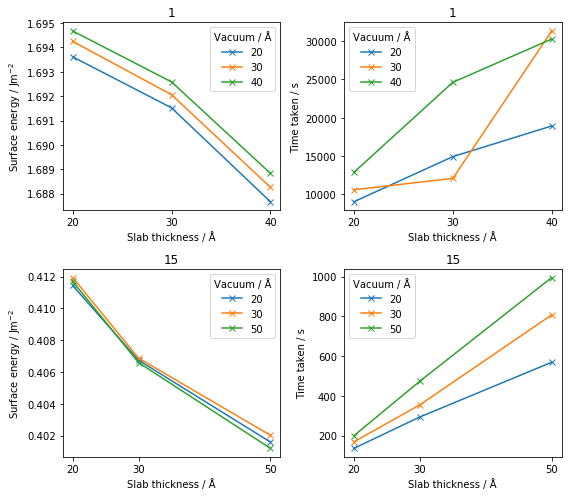

In [26]:
df_surfen = pd.read_csv(str(path_to_conv_data.joinpath('202_data.csv')))

plot_surfen(df_surfen, hkl=(2,0,2))

The energies per atom are plotted using `plot_enatom`: 

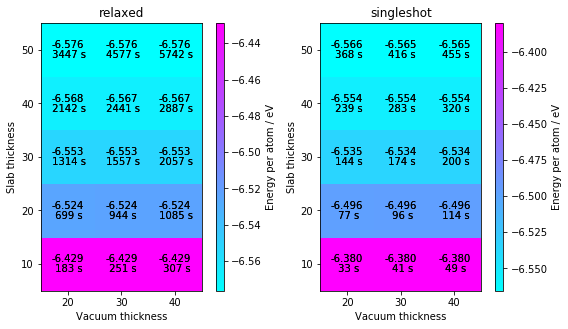

In [27]:
df_enatom = pd.read_csv(str(path_to_conv_data.joinpath('110_data.csv')))
plot_enatom(df_enatom, hkl=(1,1,0), cmap='cool', heatmap=True)

If the energies are plotted as heatmaps, the default colourmap can be changed to any other Matplotlib colourmap but note that some of the colourmaps will likely be too dark to display the numbers. 

For plotting directly from `parse_fols`, the same keyword arguments are passed to both plots (i.e. both are either heatmaps or line plots) 